# Population of Barcelona in 2025 by region of birth

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
# Load datasets
dataPath_spain = '../data/merged_data/merged_birthPlace_spain_v_outside.csv'
dataPath_region = '../data/merged_data/merged_birthPlaceRegion_sex.csv'

data_spain = pd.read_csv(dataPath_spain)
data_region = pd.read_csv(dataPath_region)

latest_year = data_region['Year_Reference'].max()


# Southern Europe total (original)
southern_europe = data_region[
    (data_region['Year_Reference'] == latest_year) &
    (data_region['Birth_Place_Region'] == 'Southern Europe')
]['Value'].sum()


# Spain-born (3 categories)

spain_places = ['City of Barcelona', 'Rest of Catalonia', 'Rest of Spain']

data_spain_total = data_spain[
    (data_spain['Birth_Place'].isin(spain_places)) &
    (data_spain['Year_Reference'] == latest_year)
]


spain_born_total = data_spain_total['Value'].sum()
print(f"Spain-born total: {spain_born_total}")

# Compute Non-Spain Southern Europe
other_southern_europe = southern_europe - spain_born_total
if other_southern_europe < 0:
    print("WARNING: negative value detected, forcing to 0")
    other_southern_europe = 0

# Other regions

other_regions = (
    data_region[
        (data_region['Year_Reference'] == latest_year) &
        (data_region['Birth_Place_Region'] != 'Southern Europe')
    ]
    .groupby('Birth_Place_Region')['Value']
    .sum()
)

for k, v in other_regions.items():
    print(f" - {k}: {v}")

# Build final region list
region_totals = other_regions.copy()
region_totals['Spain'] = spain_born_total
region_totals['Southern Europe (non-Spain)'] = other_southern_europe


# Remove zeros or negatives
region_totals = region_totals[region_totals > 0]

# Sort largest → smallest
region_totals = region_totals.sort_values(ascending=False)

# Percentages

total_population = region_totals.sum()
percentages = (region_totals / total_population * 100).round(1)

print(f"\nTotal population in {latest_year}: {total_population:,}")




Spain-born total: 1119537
 - Australia and New Zealand: 1122
 - Caribbean: 22359
 - Central America: 40515
 - Central Asia: 1090
 - Eastern Africa: 1128
 - Eastern Asia: 24013
 - Eastern Europe: 41070
 - Melanesia: 0
 - Micronesia: 0
 - Middle Africa: 1328
 - Northern Africa: 32953
 - Northern America: 11221
 - Northern Europe: 15594
 - Not available: 410
 - South America: 255096
 - South-Eastern Asia: 16283
 - Southern Africa: 448
 - Southern Asia: 55435
 - Western Africa: 6558
 - Western Asia: 15577
 - Western Europe: 35501

Total population in 2025: 1,731,206


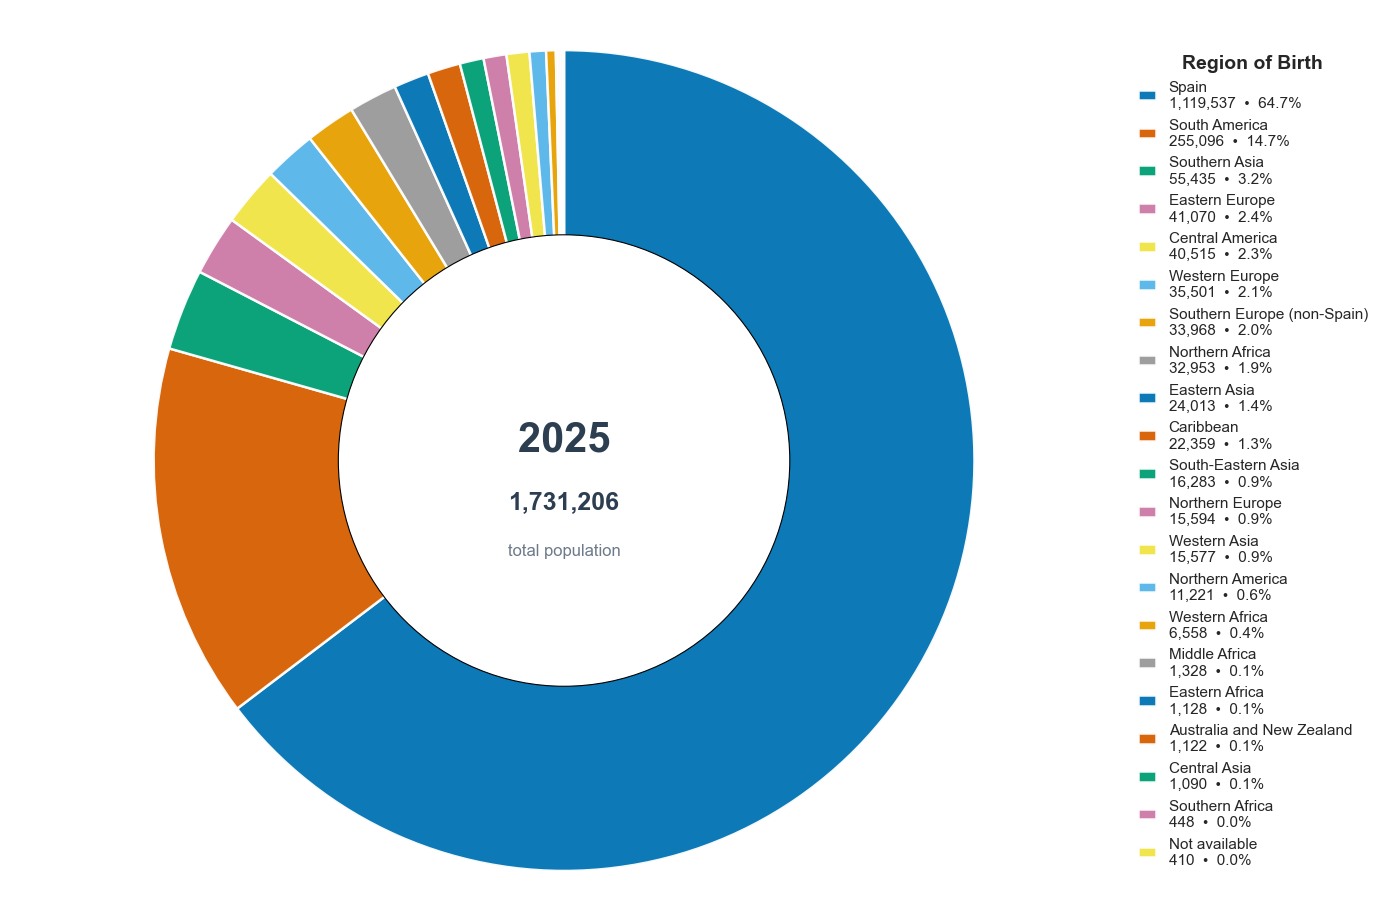

In [3]:
COLORS = [
    "#0072B2", "#D55E00", "#009E73", "#CC79A7", 
    "#F0E442", "#56B4E9", "#E69F00", "#999999"
][:len(region_totals)]

# Donut chart of population by region of birth in latest year

plt.style.use("seaborn-v0_8-white")  
sns.set_palette(COLORS)

fig, ax = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor('white')

wedges, _ = ax.pie(
    region_totals.values,
    startangle=90,
    colors=COLORS,
    counterclock=False,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.8, 'alpha': 0.95}
)

# Donut hole 
centre_circle = plt.Circle(
    (0, 0), 0.55,
    fc='white',
    edgecolor='black',
    linewidth=0.8
)
ax.add_artist(centre_circle)

# Center text (year + population)

ax.text(
    0, 0.05,
    f"{latest_year}",
    ha='center', va='center',
    fontsize=30, fontweight='bold', color='#2C3E50'
)

ax.text(
    0, -0.10,
    f"{total_population:,.0f}",
    ha='center', va='center',
    fontsize=18, fontweight='semibold', color='#2C3E50'
)

ax.text(
    0, -0.22,
    "total population",
    ha='center', va='center',
    fontsize=12, color='#6C7A89'
)

# Legend

legend_labels = [
    f"{region}\n{value:,.0f}  •  {pct}%"
    for region, value, pct in zip(
        region_totals.index, region_totals.values, percentages
    )
]

legend = ax.legend(
    wedges,
    legend_labels,
    title="Region of Birth",
    title_fontsize=14,
    loc="center left",
    bbox_to_anchor=(1.0, 0.5),
    fontsize=11,
    frameon=False,              
    handlelength=1.2,
    handletextpad=0.8,
    borderpad=0.8
)

plt.setp(legend.get_title(), weight='bold')

# Final layout
ax.axis("equal")
plt.tight_layout()

plt.savefig(
    '../data/outputs/barcelona_population_by_region_split.png',
    dpi=600, bbox_inches='tight', facecolor='white'
)

plt.show()
